Resource : https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

In [22]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. 

![img.png](https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Principal+Component+Analysis.jpg)


* Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.

* Compute the mean for every dimension of the whole dataset.

* Compute the covariance matrix of the whole dataset.

* Compute eigenvectors and the corresponding eigenvalues.

* Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.

* Use this d × k eigenvector matrix to transform the samples onto the new subspace.

![img.png](https://pbs.twimg.com/media/DXT-E8OWkAUHRN9.jpg)

In [23]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [24]:
#data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

In [25]:
X[:5] , y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [26]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [27]:
X_projected[:5]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

In [28]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [29]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

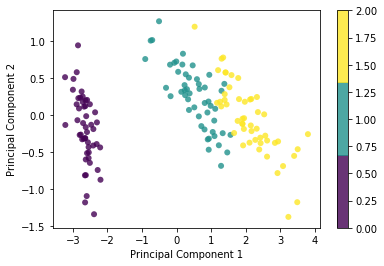

In [30]:
plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()